In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv("D:\\Course\\NOTEBOOKS\\06-Capstone-Project\\fandango_scrape.csv")

In [3]:
allsites = pd.read_csv("D:\\Course\\NOTEBOOKS\\06-Capstone-Project\\all_sites_scores.csv")

In [ ]:
# 20th December

In [21]:
fandango

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [12]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [14]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


 Creating a scatterplot showing the relationship between rating and votes. 

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

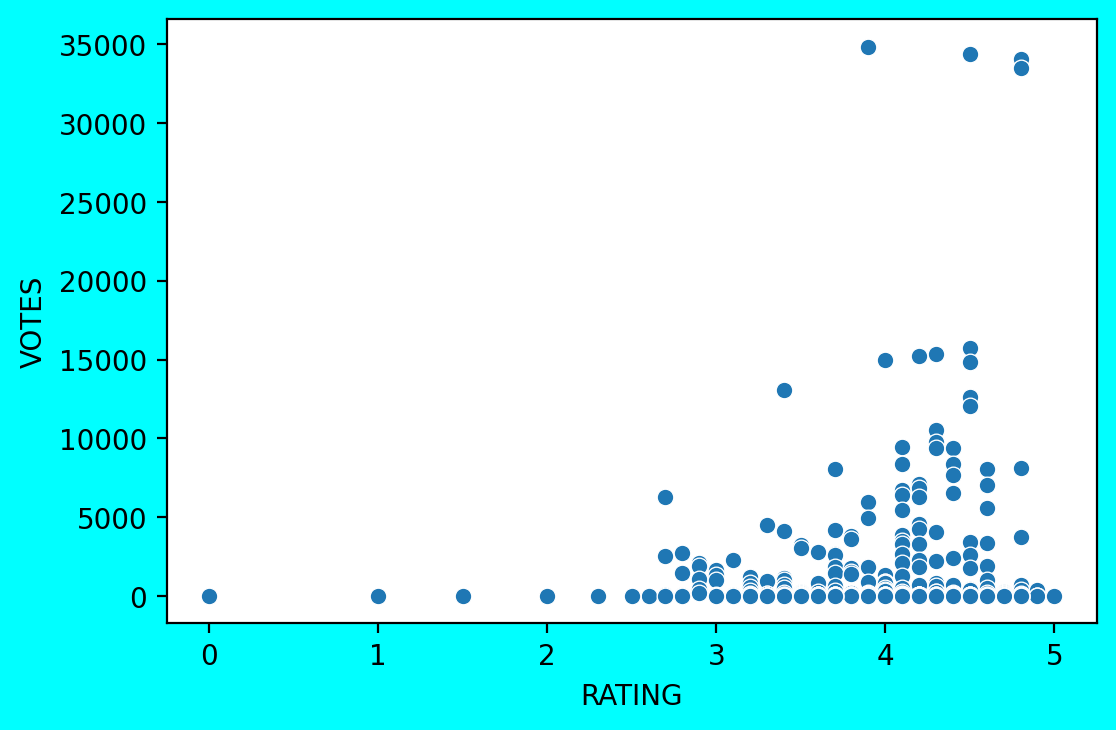

In [19]:
fig1 = plt.figure(dpi = 200, facecolor = 'cyan')
sns.scatterplot(x = 'RATING', y = 'VOTES', data = fandango, palette = 'Dark2')

# 

Calculating the correlation between columns.

In [20]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Creating a new column 'YEAR' by splitting the movie title.

In [31]:
def getyear(title):
    return title.split()[-1]

In [32]:
fandango['YEAR OF RELEASE'] = fandango['FILM'].apply(getyear) # it works

How many movies in the fandango database per year? 

In [33]:
fandango['YEAR OF RELEASE'].value_counts()

(2015)    478
(2014)     23
(2016)      1
(1964)      1
(2012)      1
Name: YEAR OF RELEASE, dtype: int64

<AxesSubplot:xlabel='YEAR OF RELEASE', ylabel='Count'>

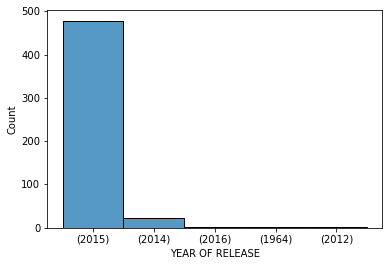

In [46]:
sns.histplot(x = 'YEAR OF RELEASE', data = fandango, palette = 'Dark2')

What are the ten movies with the most votes?

In [60]:
fandango.sort_values('VOTES', ascending = False)[:10][['FILM', 'STARS', 'RATING', 'YEAR OF RELEASE', 'VOTES']]

# OR 

# fandango.nlargest(10,'VOTES') 

,FILM,STARS,RATING,YEAR OF RELEASE,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,(2015),34846
1,Jurassic World (2015),4.5,4.5,(2015),34390
2,American Sniper (2015),5.0,4.8,(2015),34085
3,Furious 7 (2015),5.0,4.8,(2015),33538
4,Inside Out (2015),4.5,4.5,(2015),15749
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,(2014),15337
6,Kingsman: The Secret Service (2015),4.5,4.2,(2015),15205
7,Minions (2015),4.0,4.0,(2015),14998
8,Avengers: Age of Ultron (2015),5.0,4.5,(2015),14846
9,Into the Woods (2014),3.5,3.4,(2014),13055


How many movies have zero votes?

In [70]:
fandango[fandango['VOTES'] == 0]

,FILM,STARS,RATING,VOTES,YEAR OF RELEASE
435,6 Years (2015),0.0,0.0,0,(2015)
436,7 Minutes (2015),0.0,0.0,0,(2015)
437,A Year in Champagne (2015),0.0,0.0,0,(2015)
438,Balls Out (2015),0.0,0.0,0,(2015)
439,Before I Wake (2015),0.0,0.0,0,(2015)
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,(2015)
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,(2015)
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,(2015)
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,(1964)


Creating DataFrame of only reviewed films by removing any films that have zero votes.

In [34]:
reviewed = fandango['VOTES'] > 0

In [35]:
reviewedfilms = fandango[reviewed]

In [36]:
reviewedfilms

,FILM,STARS,RATING,VOTES,YEAR OF RELEASE
0,Fifty Shades of Grey (2015),4.0,3.9,34846,(2015)
1,Jurassic World (2015),4.5,4.5,34390,(2015)
2,American Sniper (2015),5.0,4.8,34085,(2015)
3,Furious 7 (2015),5.0,4.8,33538,(2015)
4,Inside Out (2015),4.5,4.5,15749,(2015)
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,(2015)
431,The Intern (2015),5.0,5.0,1,(2015)
432,The Park Bench (2015),5.0,5.0,1,(2015)
433,The Wanted 18 (2015),5.0,5.0,1,(2015)


Creating a KDE plot that displays the distribution of ratings that are displayed versus what the true rating was from votes.

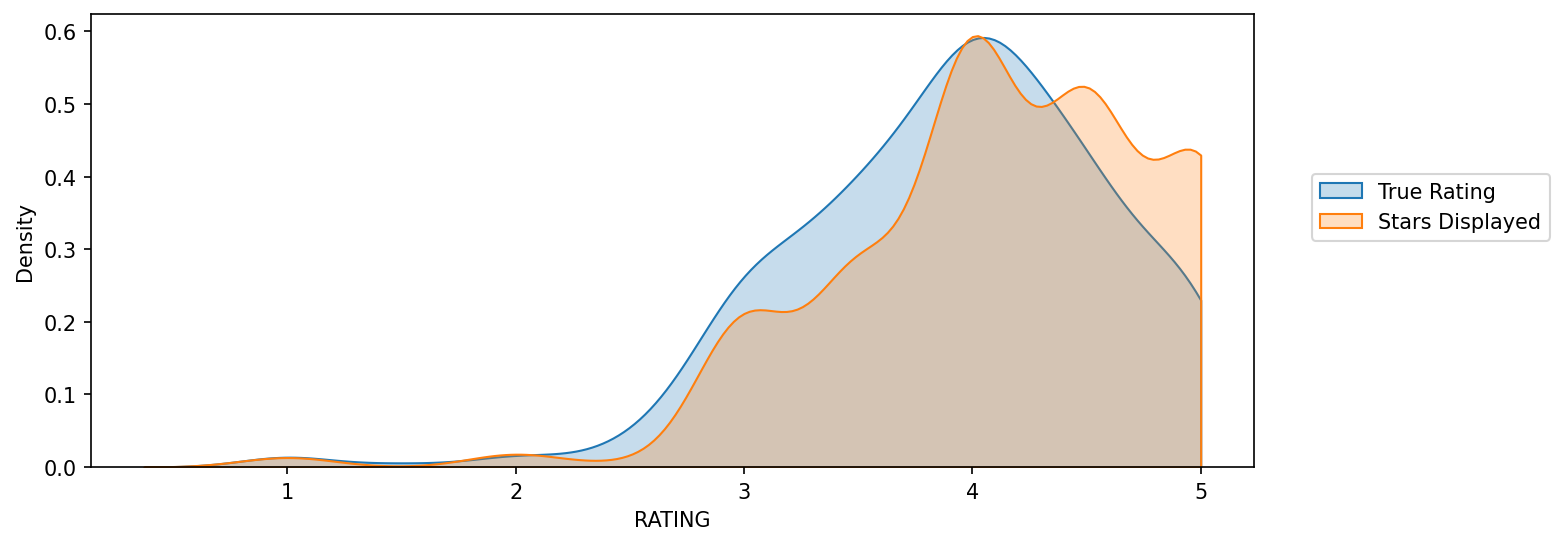

In [89]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=reviewedfilms, x='RATING', clip=[0,5], fill=True, label='True Rating')
sns.kdeplot(data=reviewedfilms, x='STARS', clip=[0,5], fill=True, label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

In [137]:
# 21st December

Creating a new column of the different between STARS displayed versus true RATING.

In [127]:
reviewedfilms["DISCREPANCY"] = reviewedfilms['STARS'] - reviewedfilms['RATING'] 
reviewedfilms['DISCREPANCY'] = reviewedfilms['DISCREPANCY'].round(2)

C:\Users\4321a\AppData\Local\Temp\ipykernel_17320\3191918641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewedfilms["DISCREPANCY"] = reviewedfilms['STARS'] - reviewedfilms['RATING']
C:\Users\4321a\AppData\Local\Temp\ipykernel_17320\3191918641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewedfilms['DISCREPANCY'] = reviewedfilms['DISCREPANCY'].round(2)


<AxesSubplot:xlabel='DISCREPANCY', ylabel='count'>

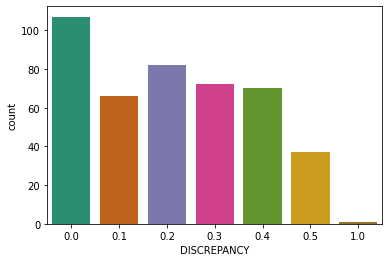

In [133]:
sns.countplot(x = 'DISCREPANCY', data = reviewedfilms, palette = 'Dark2')

Which film has a 1.0 discrepancy?

In [135]:
reviewedfilms[reviewedfilms['DISCREPANCY'] == 1.0]

,FILM,STARS,RATING,VOTES,YEAR OF RELEASE,DISCREPANCY
381,Turbo Kid (2015),5.0,4.0,2,(2015),1.0


In [9]:
allsites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


Creating a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

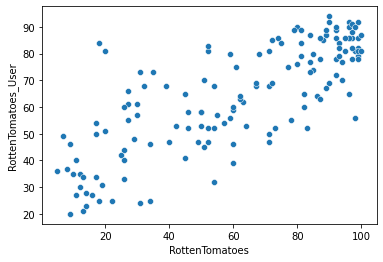

In [12]:
sns.scatterplot(x = 'RottenTomatoes', y = 'RottenTomatoes_User', data = allsites, palette = 'Dark2')

Creating column to show discrepancy between critics and audiences.

In [20]:
allsites['RottenDiff'] = allsites['RottenTomatoes'] - allsites['RottenTomatoes_User']

In [49]:
allsites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


Finding mean of the differences

In [22]:
def absolute(num):
    return abs(num)

In [23]:
allsites['RottenDiff'].apply(absolute).mean()

15.095890410958905

Plotting the distribution of the differences between RT Critics Score and RT User Score.

<AxesSubplot:xlabel='RottenDiff', ylabel='Count'>

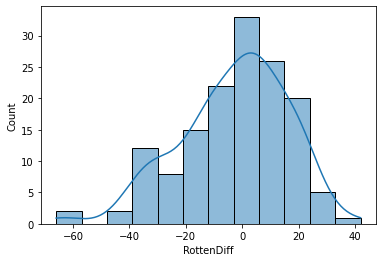

In [24]:
sns.histplot(x = 'RottenDiff', data = allsites, kde = True)

Creating a distribution showing the absolute value difference between Critics and Users on Rotten Tomatoes.

<AxesSubplot:xlabel='RottenDiff', ylabel='Count'>

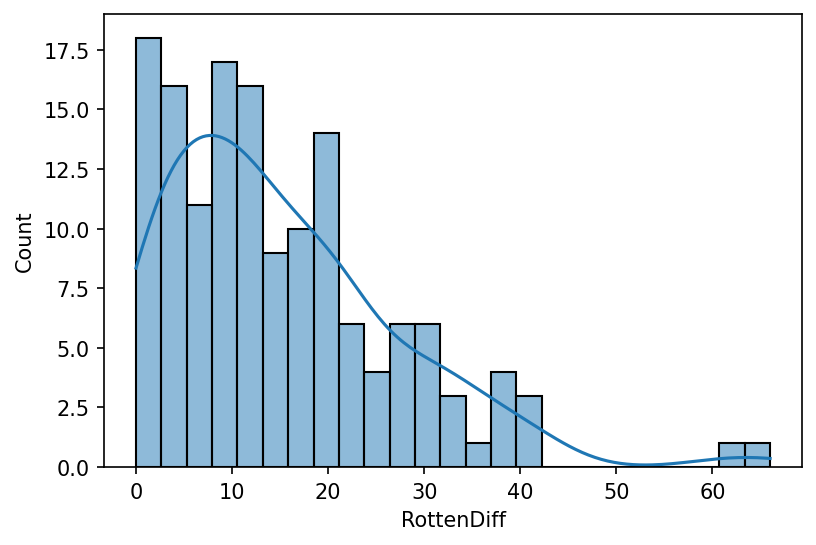

In [27]:
fig1 = plt.figure(dpi = 150)
plt.ylim(0,19)

sns.histplot(x = allsites['RottenDiff'].apply(absolute), data = allsites, kde = True, bins = 25)

First showing the top 5 movies with the largest negative difference between Users and RT critics, then vice versa.

In [26]:
allsites.nsmallest(5, 'RottenDiff')[['FILM', 'RottenDiff']]

,FILM,RottenDiff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [27]:
allsites.nlargest(5, 'RottenDiff')[['FILM', 'RottenDiff']]

,FILM,RottenDiff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


Creating a scatterplot exploring the relationship between Metacritic Critic reviews and Metacritic User reviews.

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

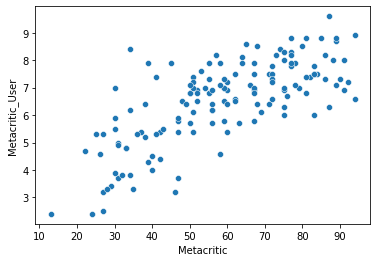

In [47]:
sns.scatterplot(x = 'Metacritic', y = 'Metacritic_User', data = allsites, palette = 'Dark2')

Creating a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

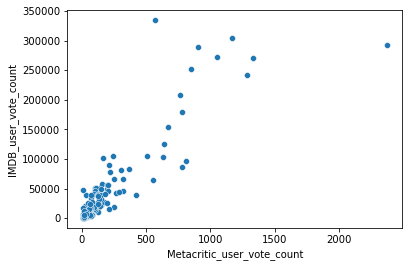

In [51]:
sns.scatterplot(x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count', data = allsites, palette = 'Dark2')

In [28]:
allsites.nlargest(1,'IMDB_user_vote_count')[['FILM', 'RottenDiff']]

,FILM,RottenDiff
14,The Imitation Game (2014),-2


In [29]:
allsites.nlargest(1,'Metacritic_user_vote_count')[['FILM', 'RottenDiff']]

,FILM,RottenDiff
88,Mad Max: Fury Road (2015),9


In [44]:
merged = pd.merge(allsites, fandango, how = 'inner')

In [46]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   RottenTomatoes              145 non-null    int64  
 2   RottenTomatoes_User         145 non-null    int64  
 3   Metacritic                  145 non-null    int64  
 4   Metacritic_User             145 non-null    float64
 5   IMDB                        145 non-null    float64
 6   Metacritic_user_vote_count  145 non-null    int64  
 7   IMDB_user_vote_count        145 non-null    int64  
 8   RottenDiff                  145 non-null    int64  
 9   STARS                       145 non-null    float64
 10  RATING                      145 non-null    float64
 11  VOTES                       145 non-null    int64  
 12  YEAR OF RELEASE             145 non-null    object 
dtypes: float64(4), int64(7), object(2)


Normalizing columns to Fandango STARS and RATINGS 0-5.

In [62]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   RottenTomatoes              145 non-null    int64  
 2   RottenTomatoes_User         145 non-null    int64  
 3   Metacritic                  145 non-null    int64  
 4   Metacritic_User             145 non-null    float64
 5   IMDB                        145 non-null    float64
 6   Metacritic_user_vote_count  145 non-null    int64  
 7   IMDB_user_vote_count        145 non-null    int64  
 8   RottenDiff                  145 non-null    int64  
 9   STARS                       145 non-null    float64
 10  RATING                      145 non-null    float64
 11  VOTES                       145 non-null    int64  
 12  YEAR OF RELEASE             145 non-null    object 
 13  RTC_Norm                    145 non

In [48]:
def firstnormalizer(num):
    return num/20

In [50]:
def secondnormalizer(num):
    return num/2

In [63]:
merged['RTC_Norm'] = round(merged['RottenTomatoes'].apply(firstnormalizer),1)

In [64]:
merged['RTU_Norm'] = round(merged['RottenTomatoes_User'].apply(firstnormalizer),1)

In [65]:
merged['MetaC_Norm'] = round(merged['Metacritic'].apply(firstnormalizer),1)

In [66]:
merged['MetaU_Norm'] = round(merged['Metacritic_User'].apply(secondnormalizer),1)

In [67]:
merged['IMDB_Norm'] = round(merged['IMDB'].apply(secondnormalizer),1)

Now making a norm_scores DataFrame that only contains the normalized ratings.

In [78]:
normscores = merged[['STARS','RATING','RTC_Norm','RTU_Norm','MetaC_Norm','MetaU_Norm','IMDB_Norm']]

Creating a plot comparing the distributions of normalized ratings across all sites.

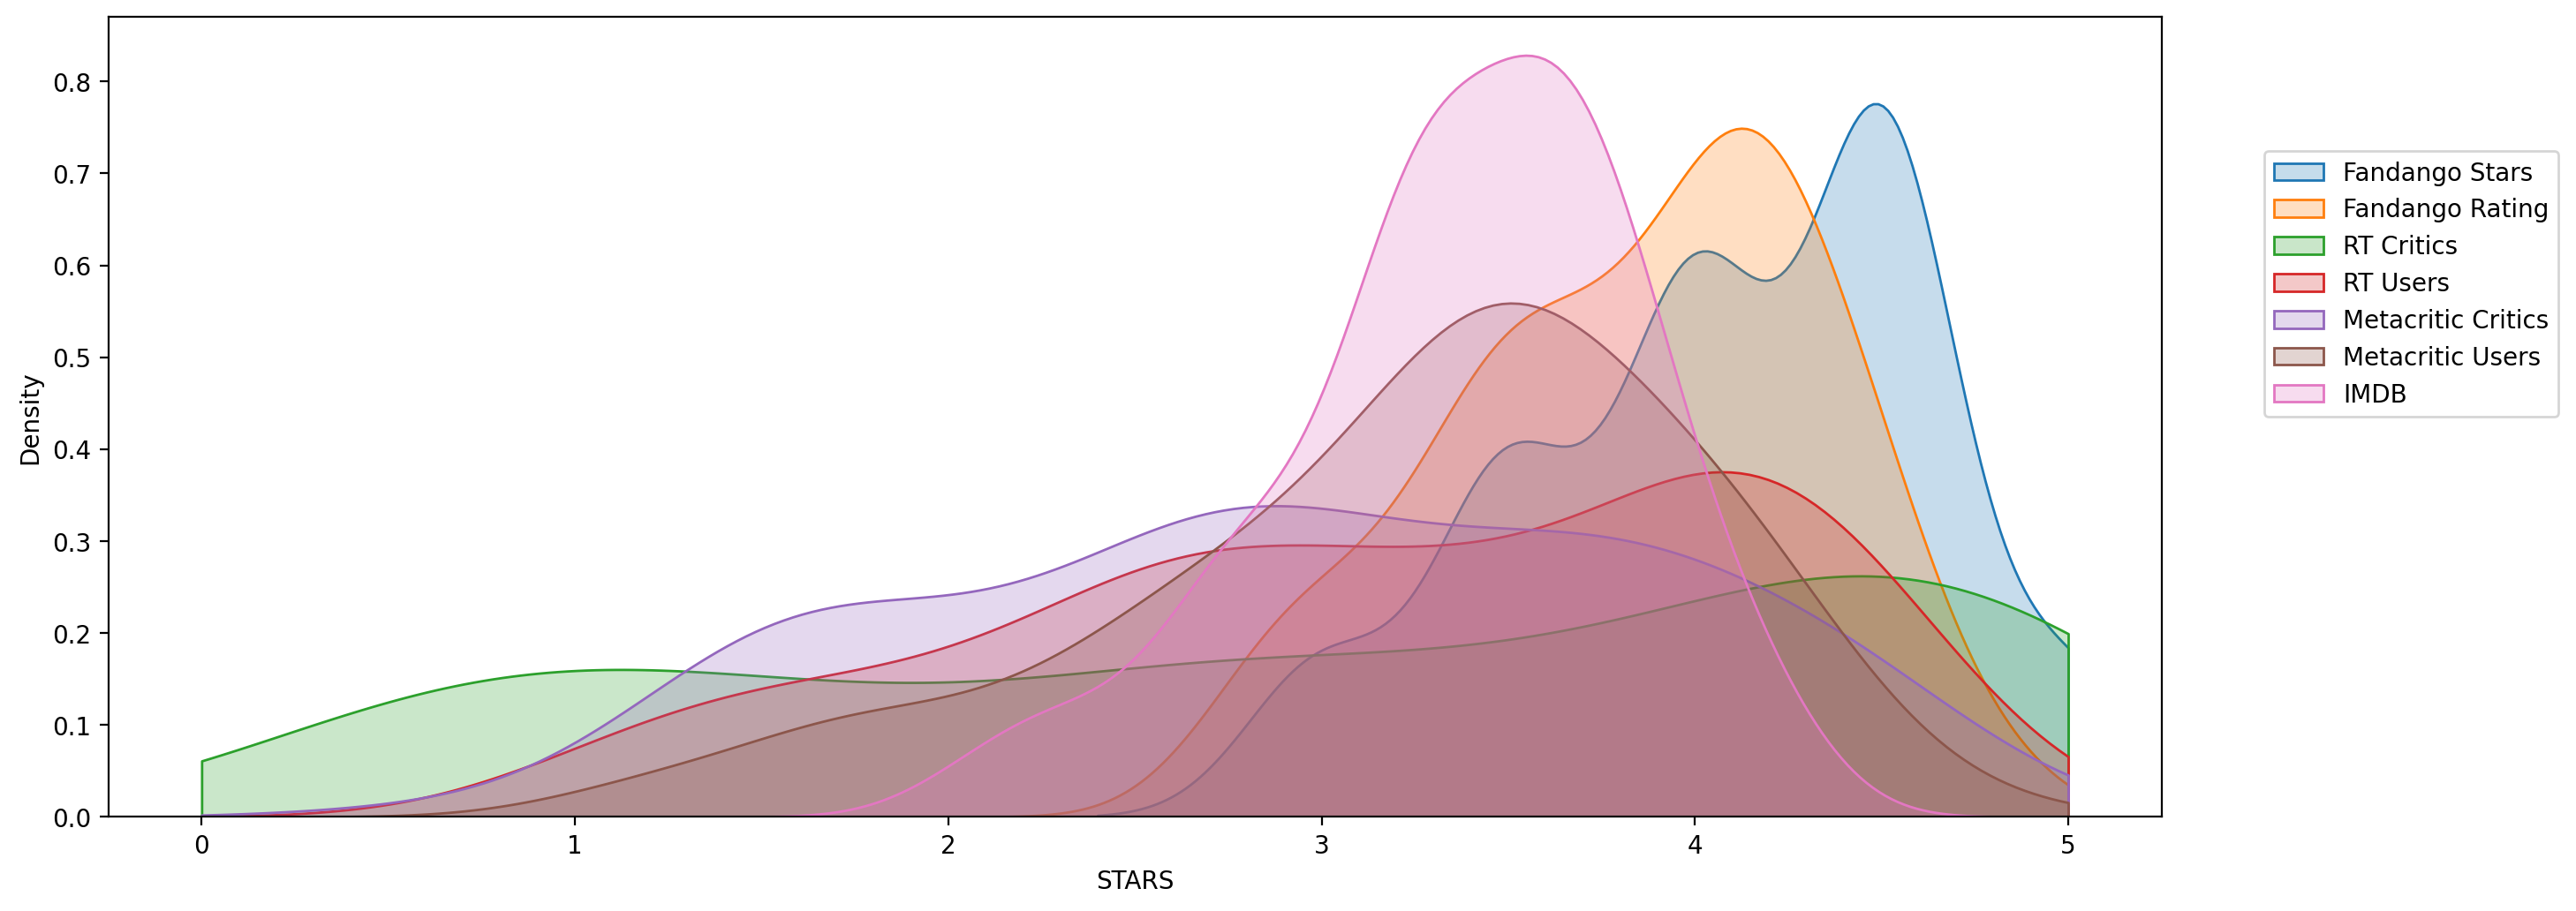

In [93]:
fig1 = plt.figure(dpi = 200, figsize = (15,6))


sns.kdeplot(x = 'STARS', data = normscores, fill = True, clip = (0,5), label = 'Fandango Stars')
sns.kdeplot(x = 'RATING', data = normscores, fill = True, clip = (0,5), label = 'Fandango Rating')
sns.kdeplot(x = 'RTC_Norm', data = normscores, fill = True, clip = (0,5), label = 'RT Critics')
sns.kdeplot(x = 'RTU_Norm', data = normscores, fill = True, clip = (0,5), label = 'RT Users')
sns.kdeplot(x = 'MetaC_Norm', data = normscores, fill = True, clip = (0,5), label = 'Metacritic Critics')
sns.kdeplot(x = 'MetaU_Norm', data = normscores, fill = True, clip = (0,5), label = 'Metacritic Users')
sns.kdeplot(x = 'IMDB_Norm', data = normscores, fill = True, clip = (0,5), label = 'IMDB')

plt.legend(loc = (1.05,0.5))

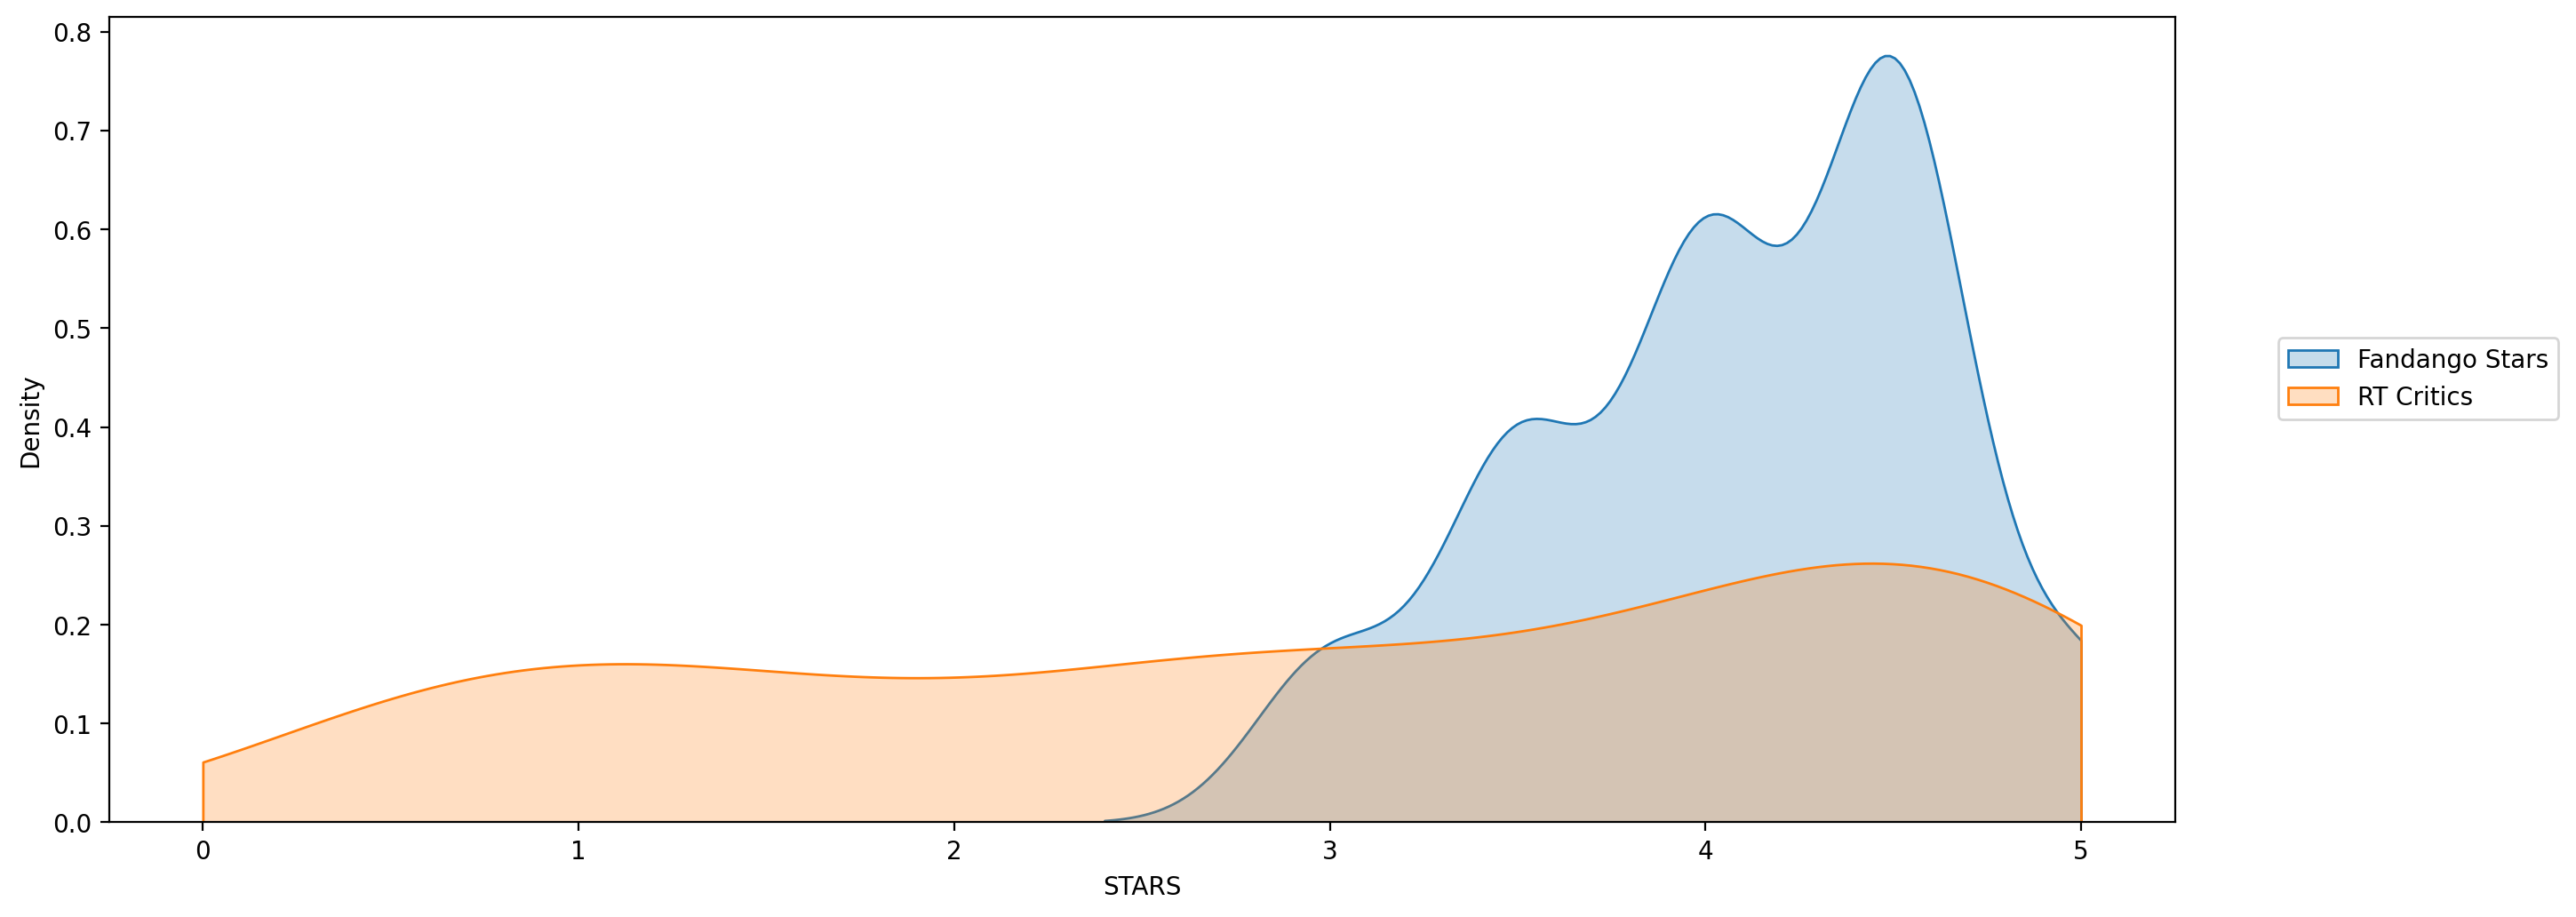

In [95]:
fig2 = plt.figure(dpi = 200, figsize = (15,6))

sns.kdeplot(x = 'STARS', data = normscores, fill = True, clip = (0,5), label = 'Fandango Stars')
sns.kdeplot(x = 'RTC_Norm', data = normscores, fill = True, clip = (0,5), label = 'RT Critics')

plt.legend(loc = (1.05,0.5))

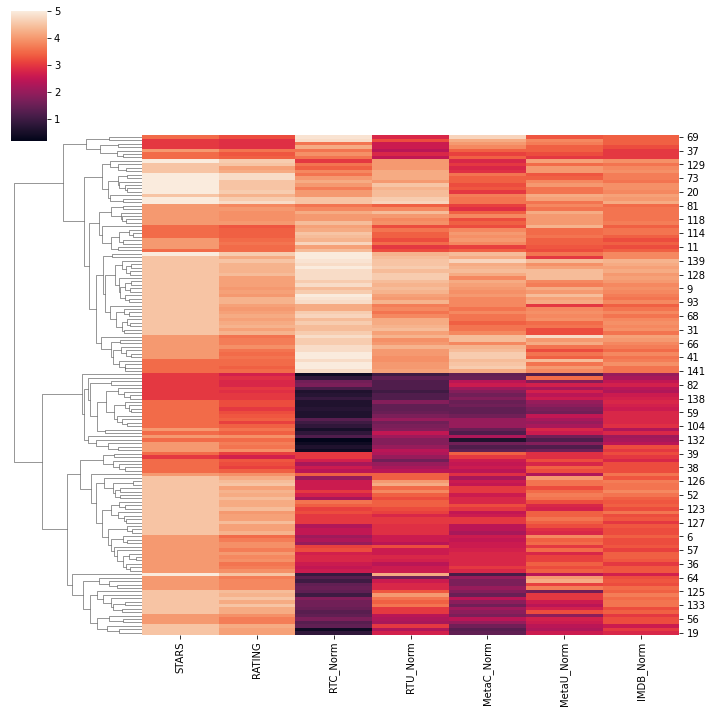

In [97]:
sns.clustermap(data = normscores, col_cluster = False)

Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies.

In [102]:
normfilms = merged[['STARS','RATING','RTC_Norm','RTU_Norm','MetaC_Norm','MetaU_Norm','IMDB_Norm','FILM']]

In [103]:
normfilms

,STARS,RATING,RTC_Norm,RTU_Norm,MetaC_Norm,MetaU_Norm,IMDB_Norm,FILM
0,5.0,4.5,3.7,4.3,3.3,3.6,3.9,Avengers: Age of Ultron (2015)
1,5.0,4.5,4.2,4.0,3.4,3.8,3.6,Cinderella (2015)
2,5.0,4.5,4.0,4.5,3.2,4.0,3.9,Ant-Man (2015)
3,5.0,4.5,0.9,4.2,1.1,2.4,2.7,Do You Believe? (2015)
4,3.5,3.0,0.7,1.4,1.4,1.7,2.6,Hot Tub Time Machine 2 (2015)
...,...,...,...,...,...,...,...,...
140,4.0,4.0,4.4,3.9,3.4,4.0,3.7,Mr. Holmes (2015)
141,3.5,3.5,4.8,4.1,4.2,3.8,3.6,'71 (2015)
142,3.5,3.5,4.8,3.9,4.4,4.4,3.7,"Two Days, One Night (2014)"
143,3.5,3.5,5.0,4.0,4.5,3.6,3.9,Gett: The Trial of Viviane Amsalem (2015)


In [107]:
tensmallest = normfilms.nsmallest(10,'RTC_Norm')

<AxesSubplot:ylabel='Density'>

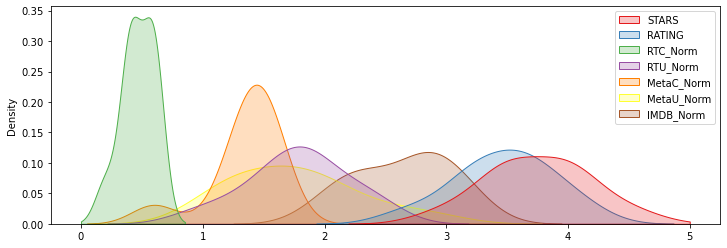

In [112]:
fig3 = plt.figure(figsize = (12,4))

worstfilms = normfilms.nsmallest(10,'RTC_Norm').drop('FILM',axis=1)
sns.kdeplot(data = worstfilms, clip=[0,5], shade=True, palette='Set1')